## Amazon.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate as tab

df = pd.read_csv('amazon.csv', encoding='iso-8859-1')

### Display top 10 rows of the dataset.

In [2]:
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


### Check last 10 rows.

In [3]:
df.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
6446,2009,Tocantins,Dezembro,46.0,2009-01-01
6447,2010,Tocantins,Dezembro,72.0,2010-01-01
6448,2011,Tocantins,Dezembro,105.0,2011-01-01
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### Find shape of the dataset (number of rows and number of columns).

In [4]:
x, y = df.shape
print(f'Rows: {x}\nColumns: {y}')

Rows: 6454
Columns: 5


### Get information about the dataset like total number rows, total number of columns, datatypes of each column and memory requirement.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


### Check for duplicate data and drop them.

In [6]:
x = 0
duplicates = df.duplicated()
for i in duplicates:
    if i == True:
        x +=1
print(f'Number of duplicated data: {x}')

df_clean = df.drop_duplicates()
print('Data is cleaned')

Number of duplicated data: 32
Data is cleaned


### Check null values in the dataset.

In [7]:
df_clean.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

### Get overall statistics about the dataframe.

In [8]:
df_clean['number'].describe()

count    6422.000000
mean      108.815178
std       191.142482
min         0.000000
25%         3.000000
50%        24.497000
75%       114.000000
max       998.000000
Name: number, dtype: float64

### Rename month names to English.

In [9]:
bra = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
eng = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_clean.loc[:, 'month'] = df_clean.loc[:, 'month'].replace(bra, eng)

### Get the total number of fires registered.

In [10]:
fir_tot = df_clean['number'].sum()
print(f'Total number of fires registered: {fir_tot}')

Total number of fires registered: 698811.073


### In which month maximum number of forest fires were reported?

In [11]:
mf = df_clean.groupby('month', sort = False).agg({'number': 'sum'})
mf_sort = mf.sort_values('number', ascending = False).reset_index()

print(f'{mf_sort["month"][0]} has the maximum reported forest fire with {mf_sort["number"][0]}')

July has the maximum reported forest fire with 92319.113


### In which year maximum number of forest fires was reported?

In [12]:
yf = df_clean.groupby('year', sort = False).agg({'number': 'sum'})
yf_sort = yf.sort_values('number', ascending = False).reset_index()

print(f'{yf_sort["year"][0]} has the maximum reported forest fire with {yf_sort["number"][0]}')

2003 has the maximum reported forest fire with 42760.674


### In which state maximum number of forest fires was reported?

In [13]:
sf = df_clean.groupby('state', sort = False).agg({'number': 'sum'})
sf_sort = sf.sort_values('number', ascending = False).reset_index()

print(f'{sf_sort["state"][0]} has the maximum reported forest fire with {sf_sort["number"][0]}')

Mato Grosso has the maximum reported forest fire with 96246.028


### Find total number of fires were reported in Amazonas.

In [14]:
fa = df_clean[(df_clean['state'] == 'Amazonas')]['number'].sum()
print(f'The total number of fires reported in Amazonas is {fa}')

The total number of fires reported in Amazonas is 30650.129


### Display number of fires were reported in Amazonas (year-wise)

In [15]:
yfa = df_clean[(df_clean['state'] == 'Amazonas')].groupby('year', sort=False).agg({'number': 'sum'})

print('Number of Fires in Amazonas per ')
print(tab(yfa, headers = ['Year', 'Reported Fires'], tablefmt = 'github', floatfmt = '.3f'))

Number of Fires in Amazonas per 
|   Year |   Reported Fires |
|--------|------------------|
|   1998 |          946.000 |
|   1999 |         1061.000 |
|   2000 |          853.000 |
|   2001 |         1297.000 |
|   2002 |         2852.000 |
|   2003 |         1524.268 |
|   2004 |         2298.207 |
|   2005 |         1657.128 |
|   2006 |          997.640 |
|   2007 |          589.601 |
|   2008 |         2717.000 |
|   2009 |         1320.601 |
|   2010 |         2324.508 |
|   2011 |         1652.538 |
|   2012 |         1110.641 |
|   2013 |          905.217 |
|   2014 |         2385.909 |
|   2015 |         1189.994 |
|   2016 |         2060.972 |
|   2017 |          906.905 |


### Display number of fires were reported in Amazonas (day-wise).

In [16]:
dfa = df_clean[(df_clean['state'] == 'Amazonas')].groupby('date', sort=False).agg({'number': 'sum'})

print('Number of Fires in Amazonas per date')
print(tab(dfa, headers = ['Year', 'Reported Fires'], tablefmt = 'github', floatfmt = '.3f'))

Number of Fires in Amazonas per date
| Year       |   Reported Fires |
|------------|------------------|
| 1998-01-01 |          946.000 |
| 1999-01-01 |         1061.000 |
| 2000-01-01 |          853.000 |
| 2001-01-01 |         1297.000 |
| 2002-01-01 |         2852.000 |
| 2003-01-01 |         1524.268 |
| 2004-01-01 |         2298.207 |
| 2005-01-01 |         1657.128 |
| 2006-01-01 |          997.640 |
| 2007-01-01 |          589.601 |
| 2008-01-01 |         2717.000 |
| 2009-01-01 |         1320.601 |
| 2010-01-01 |         2324.508 |
| 2011-01-01 |         1652.538 |
| 2012-01-01 |         1110.641 |
| 2013-01-01 |          905.217 |
| 2014-01-01 |         2385.909 |
| 2015-01-01 |         1189.994 |
| 2016-01-01 |         2060.972 |
| 2017-01-01 |          906.905 |


### Find total number of fires were reported in 2015 and visualize data based on each ‘month’.

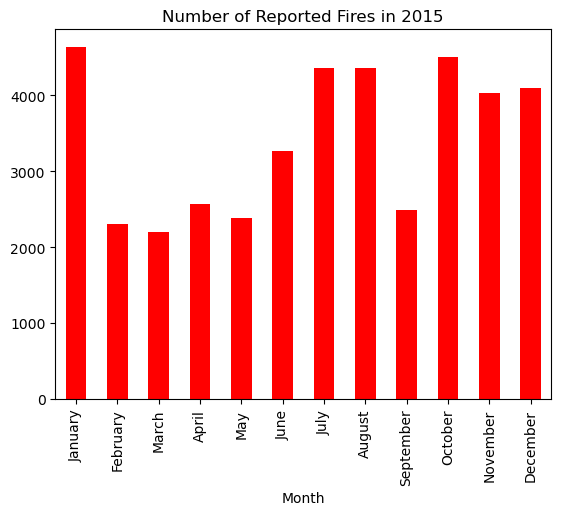

In [17]:
f2015 = df_clean[(df_clean['year'] == 2015)].groupby('month', sort=False).agg({'number': 'sum'}).reset_index()

twe = f2015.plot(x = 'month', y = 'number', kind = 'bar', stacked = False, title = 'Number of Reported Fires in 2015', color = 'red', legend = False)
twe.set_xlabel('Month')
plt.show()

### Find average number of fires were reported from highest to lowest (state-wise).

In [18]:
ave = df_clean.groupby('state')['number'].mean().reset_index()
ave_sort = ave.sort_values('number', ascending=False)

print('Average Number of Fires Reported by State')
print(tab(ave_sort, headers = ['State', '# of Reports'], tablefmt = 'github', floatfmt = '.3f', showindex = False))

Average Number of Fires Reported by State
| State            |   # of Reports |
|------------------|----------------|
| Sao Paulo        |        213.896 |
| Mato Grosso      |        203.480 |
| Bahia            |        187.223 |
| Piau             |        158.175 |
| Goias            |        157.722 |
| Minas Gerais     |        156.800 |
| Tocantins        |        141.037 |
| Amazonas         |        128.243 |
| Ceara            |        127.314 |
| Paraiba          |        111.074 |
| Maranhao         |        105.143 |
| Pará             |        102.561 |
| Pernambuco       |        102.502 |
| Roraima          |        102.030 |
| Santa Catarina   |        101.924 |
| Amapa            |         91.346 |
| Rondonia         |         84.876 |
| Acre             |         77.255 |
| Rio              |         64.699 |
| Espirito Santo   |         27.389 |
| Alagoas          |         19.272 |
| Distrito Federal |         14.900 |
| Sergipe          |         13.544 |


### Find the state names where fires were reported in 'dec' month

In [19]:
dec = df_clean[(df_clean['month'] == 'December') & (df_clean['number'] > 0)].groupby('state').agg({'number': 'sum'})



##  MovieLens 25M Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate as tab
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import random

movies = pd.read_csv("Movielens 25M Dataset/movies.csv")
ratings = pd.read_csv("Movielens 25M Dataset/ratings.csv")
tags = pd.read_csv("Movielens 25M Dataset/tags.csv")
gtags = pd.read_csv("Movielens 25M Dataset/genome-tags.csv")
gscores = pd.read_csv("Movielens 25M Dataset/genome-scores.csv")


movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [21]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [22]:
tags

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


In [23]:
gtags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [24]:
gscores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


### How many movies are released each year? 

|   Year |   Frequency |
|--------|-------------|
|   1874 |           1 |
|   1878 |           1 |
|   1880 |           1 |
|   1883 |           1 |
|   1887 |           1 |
|   1888 |           4 |
|   1890 |           5 |
|   1891 |           6 |
|   1892 |           3 |
|   1894 |          22 |
|   1895 |          15 |
|   1896 |          22 |
|   1897 |          13 |
|   1898 |          14 |
|   1899 |           8 |
|   1900 |          22 |
|   1901 |          12 |
|   1902 |           6 |
|   1903 |          26 |
|   1904 |          11 |
|   1905 |          10 |
|   1906 |          17 |
|   1907 |          18 |
|   1908 |          17 |
|   1909 |          16 |
|   1910 |          11 |
|   1911 |          11 |
|   1912 |          19 |
|   1913 |          15 |
|   1914 |          42 |
|   1915 |          28 |
|   1916 |          37 |
|   1917 |          26 |
|   1918 |          20 |
|   1919 |          30 |
|   1920 |          36 |
|   1921 |          48 |
|   1922 |          46 |


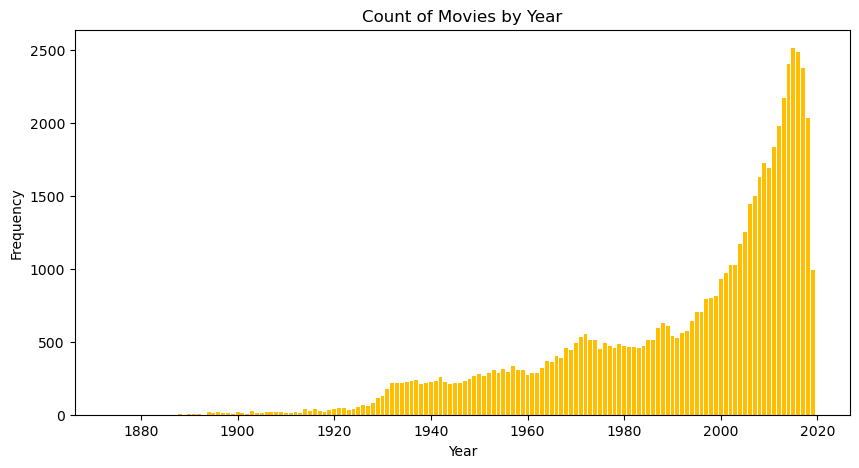

In [25]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').fillna(0).astype(int)

my = movies['year'].value_counts().sort_values(ascending = True).reset_index(name='count')
for index, row in my.iterrows():
    if row['year'] == 0:
        my = my.drop(index)
my = my.sort_values('year', ascending = True)
my = my.rename(columns={'index': 'year', 'count': 'frequency'})

print(tab(my, headers = ['Year', 'Frequency'], tablefmt = 'github', showindex = False))

plt.figure(figsize=(10, 5))
plt.bar(my['year'], my['frequency'], color = '#ffbf00')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Count of Movies by Year')
plt.show()

#### What is the percentage of change over time?

Percentage of Change over Time
|   Year |   Change(%) |
|--------|-------------|
|   1874 |  nan        |
|   1878 |    0        |
|   1880 |    0        |
|   1883 |    0        |
|   1887 |    0        |
|   1888 |  300        |
|   1890 |   25        |
|   1891 |   20        |
|   1892 |  -50        |
|   1894 |  633.333    |
|   1895 |  -31.8182   |
|   1896 |   46.6667   |
|   1897 |  -40.9091   |
|   1898 |    7.69231  |
|   1899 |  -42.8571   |
|   1900 |  175        |
|   1901 |  -45.4545   |
|   1902 |  -50        |
|   1903 |  333.333    |
|   1904 |  -57.6923   |
|   1905 |   -9.09091  |
|   1906 |   70        |
|   1907 |    5.88235  |
|   1908 |   -5.55556  |
|   1909 |   -5.88235  |
|   1910 |  -31.25     |
|   1911 |    0        |
|   1912 |   72.7273   |
|   1913 |  -21.0526   |
|   1914 |  180        |
|   1915 |  -33.3333   |
|   1916 |   32.1429   |
|   1917 |  -29.7297   |
|   1918 |  -23.0769   |
|   1919 |   50        |
|   1920 |   20        |
|   1921 |   33.333

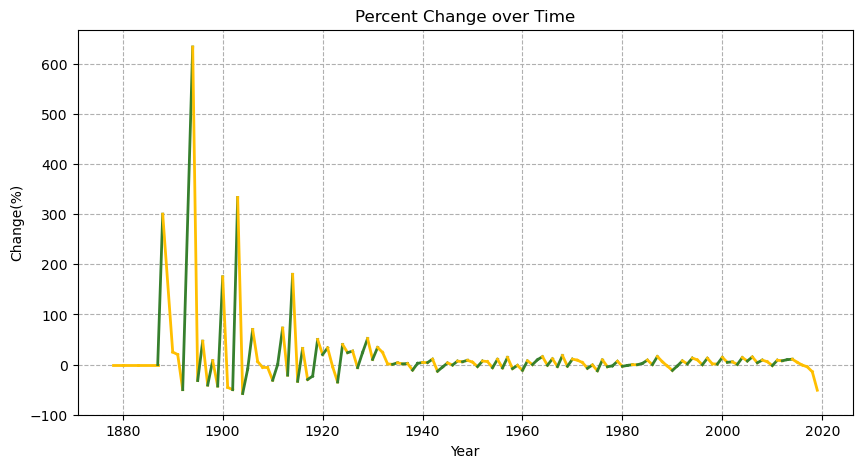

In [26]:
mypc = pd.DataFrame()
mypc['Year'] = my['year']
mypc['Change'] = my['frequency'].pct_change()
mypc['Change'] = mypc['Change'] * 100

print('Percentage of Change over Time')
print(tab(mypc, headers = ['Year', 'Change(%)'], tablefmt = 'github', showindex = False))

dy = np.diff(mypc['Change'])
colors = ['#36802d' if d > 0 else '#ffbf00' for d in dy]
fig, ax = plt.subplots(figsize = (10,5))
for i in range(len(mypc)-1):
    ax.plot(mypc['Year'][i:i+2], mypc['Change'][i:i+2], color = colors[i], linewidth = 2)
ax.set(title = 'Percent Change over Time', xlabel = 'Year', ylabel = 'Change(%)', ylim = -100)
ax.grid(linestyle = 'dashed')
plt.show()

### What are the most popular genre of movies?

Movie Genre Occurences
| Genre              |   Frequency |
|--------------------|-------------|
| Adventure          |        4145 |
| Animation          |        2929 |
| Children           |        2935 |
| Comedy             |       16870 |
| Fantasy            |        2731 |
| Romance            |        7719 |
| Drama              |       25606 |
| Action             |        7348 |
| Crime              |        5319 |
| Thriller           |        8654 |
| Horror             |        5989 |
| Mystery            |        2925 |
| Sci-Fi             |        3595 |
| IMAX               |         195 |
| Documentary        |        5605 |
| War                |        1874 |
| Musical            |        1054 |
| Western            |        1399 |
| Film-Noir          |         353 |
| (no genres listed) |        5062 |


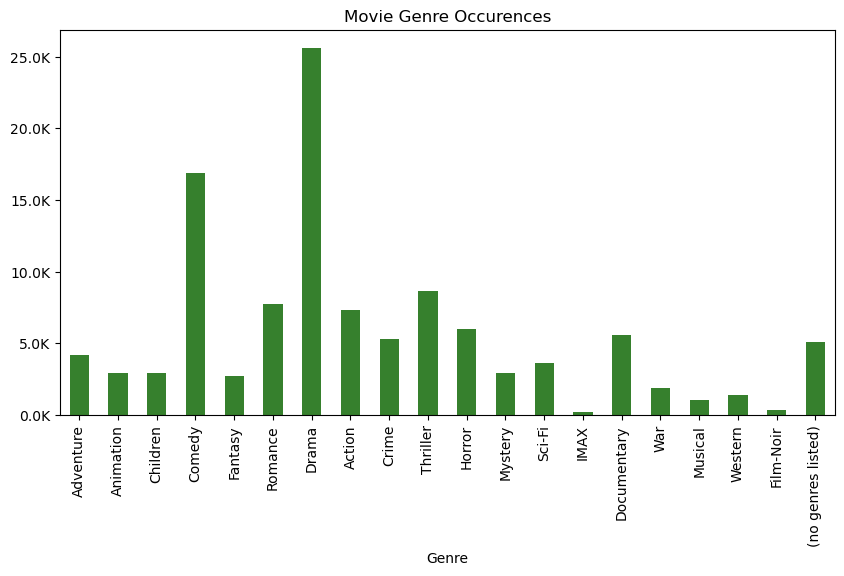

In [27]:
mg = movies['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
mgc = mg.value_counts(sort = False)
mgc = mgc.to_frame().reset_index()
mgc.columns = ['Genre', 'Count']

print('Movie Genre Occurences')
print(tab(mgc, headers = ['Genre', 'Frequency'], tablefmt = 'github', showindex = False))

mgcp = mgc.plot(x = 'Genre', y = 'Count', kind = 'bar', stacked = False, title = 'Movie Genre Occurences', color = '#36802d', legend = False, figsize = (10, 5))
mgcp.set_xlabel('Genre')
formatter = FuncFormatter(lambda x, _: '{:,}K'.format(x/1e3))
mgcp.yaxis.set_major_formatter(formatter)
plt.show()

### Does the taste of movies changes over time?

In [28]:
myg = pd.DataFrame()
myg['Year'] = movies['year']
myg['Genres'] = movies['genres'] 

myg = myg.assign(Genres = myg.Genres.str.split('|')).explode('Genres')
myg = myg[myg.Genres.ne('(no genres listed)') & myg.Genres.ne('')]
myg = myg.reset_index(drop=True)

myg['Frequency'] = 1
myg = myg.groupby(['Year', 'Genres']).sum().reset_index()
for index, row in myg.iterrows():
    if row['Year'] == 0:
        myg = myg.drop(index)

print(tab(myg, headers = ['Year', 'Genres', 'Frequency'], tablefmt = 'github', showindex = False))

|   Year | Genres      |   Frequency |
|--------|-------------|-------------|
|   1874 | Documentary |           1 |
|   1880 | Documentary |           1 |
|   1888 | Documentary |           4 |
|   1890 | Comedy      |           1 |
|   1891 | Action      |           1 |
|   1891 | Documentary |           4 |
|   1892 | Animation   |           1 |
|   1894 | Comedy      |           3 |
|   1894 | Documentary |          14 |
|   1894 | Drama       |           1 |
|   1895 | Comedy      |           2 |
|   1895 | Documentary |           8 |
|   1895 | Drama       |           1 |
|   1895 | Sci-Fi      |           1 |
|   1896 | Comedy      |           1 |
|   1896 | Documentary |           8 |
|   1896 | Fantasy     |           2 |
|   1896 | Horror      |           3 |
|   1897 | Action      |           1 |
|   1897 | Comedy      |           2 |
|   1897 | Documentary |           3 |
|   1897 | Drama       |           1 |
|   1897 | Fantasy     |           1 |
|   1897 | Horror      | 

#### Single Graph

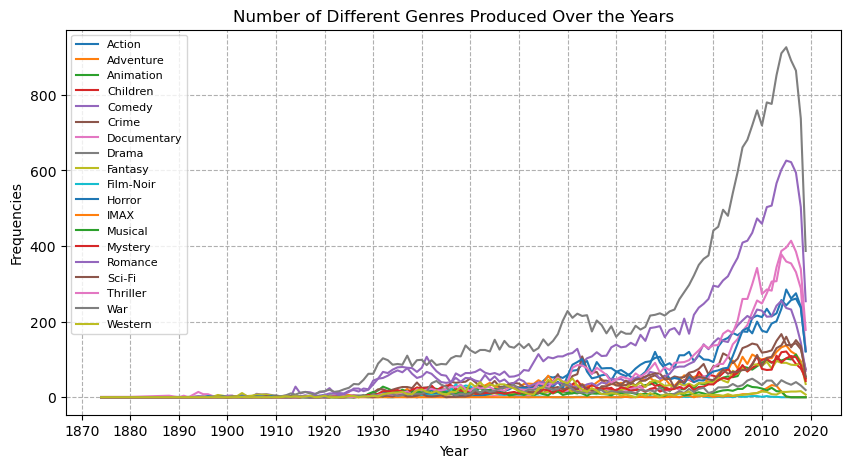

In [29]:
mygc = myg.groupby(['Genres', 'Year']).sum()
mygc = mygc.unstack().fillna(0)

fig, ax = plt.subplots(figsize=(10, 5))

for index, row in mygc.iterrows():
    s = row['Frequency']
    s.plot(ax = ax, xlabel='Year', ylabel='Frequencies', title = f"Number of Different Genres Produced Over the Years", xticks = range(1870, 2030, 10))

ax.legend(prop={'size': 8})
plt.grid(linestyle = 'dashed')
plt.show()

#### Multiple Graphs

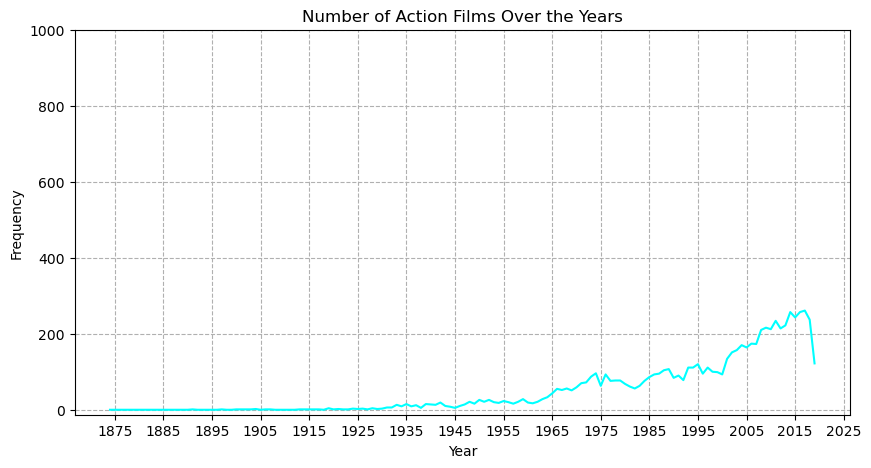

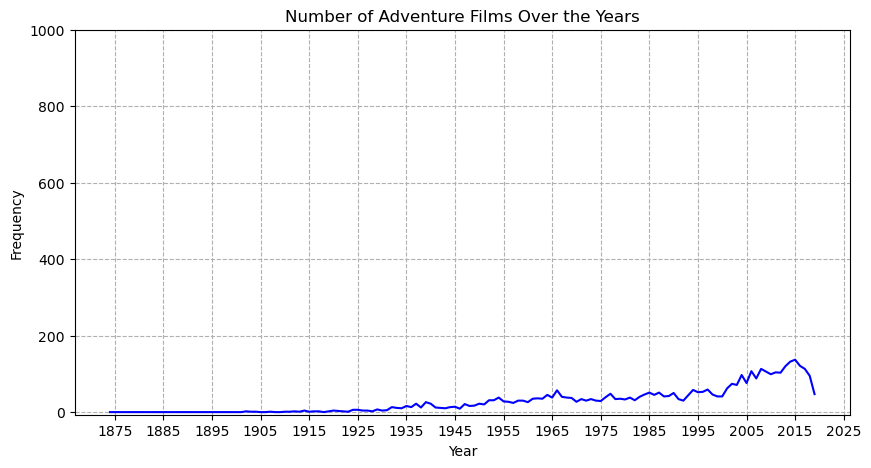

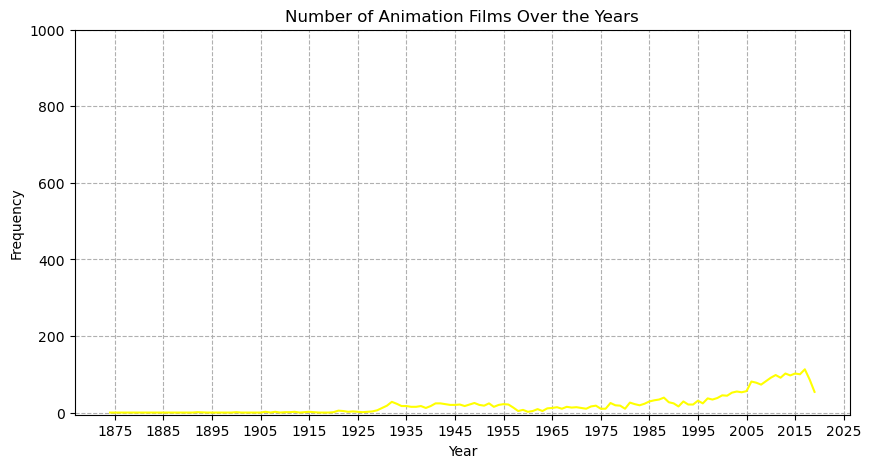

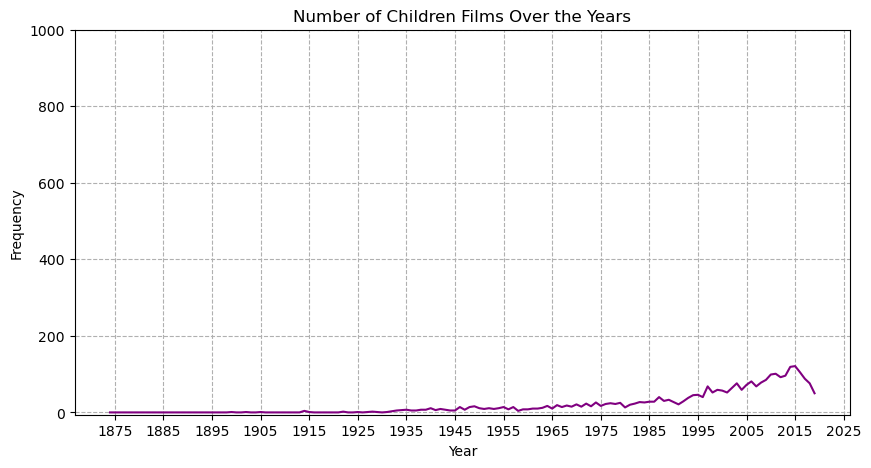

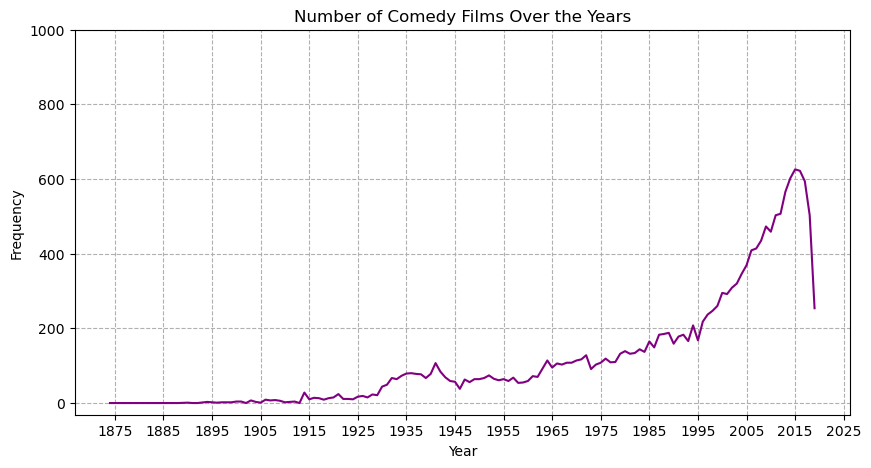

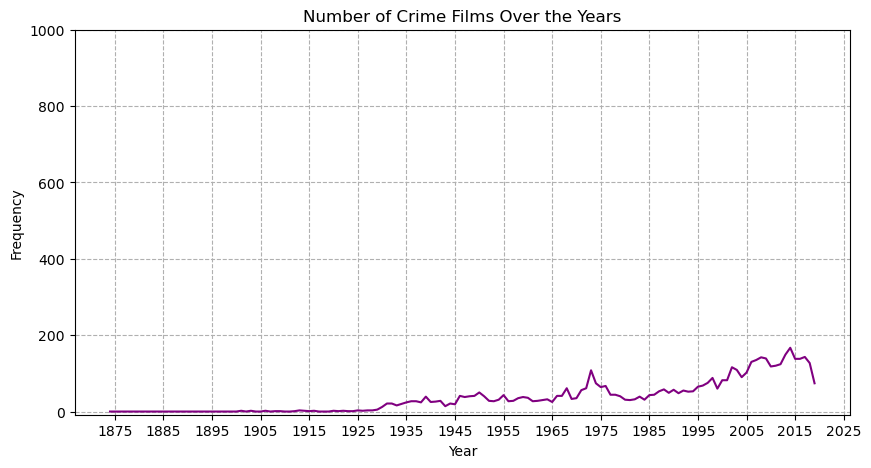

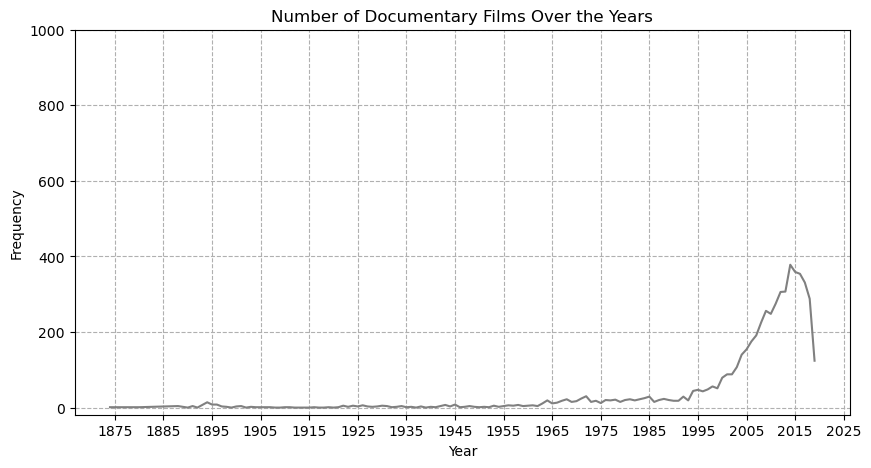

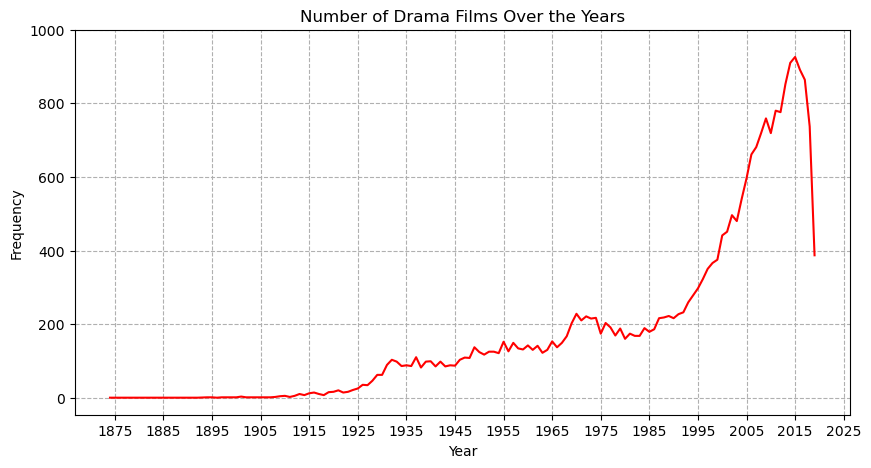

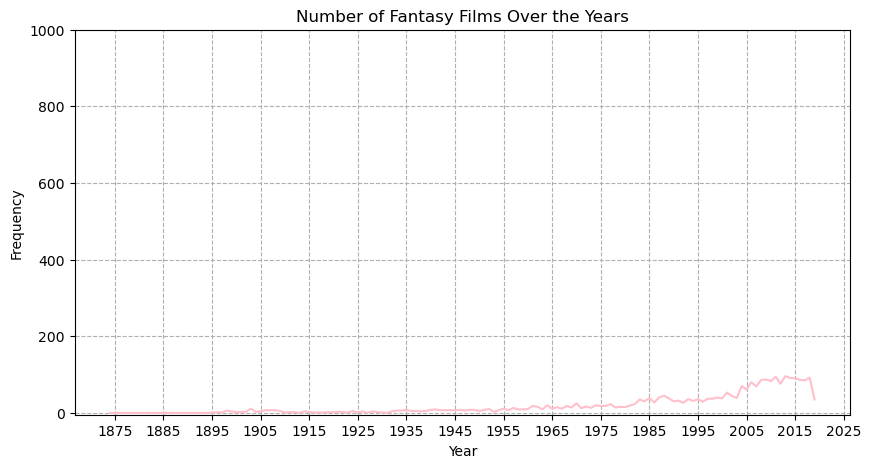

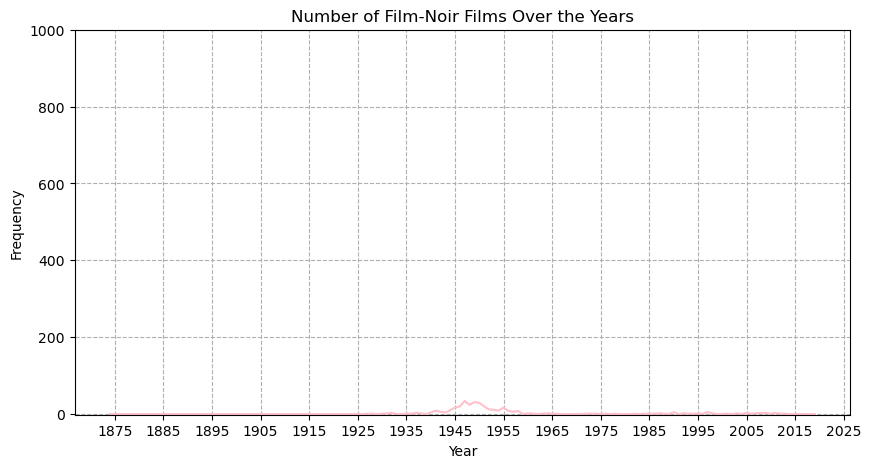

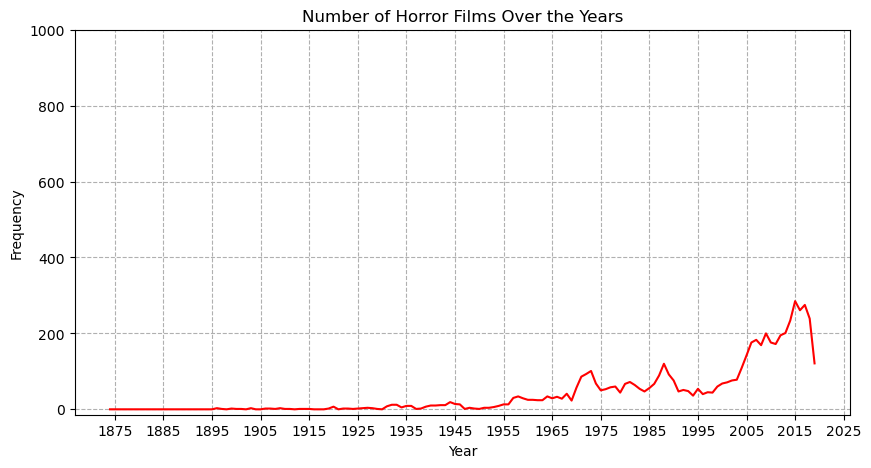

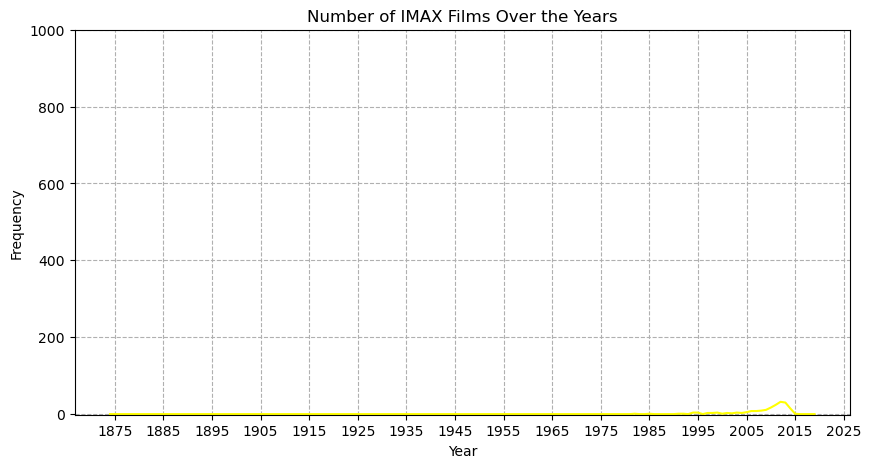

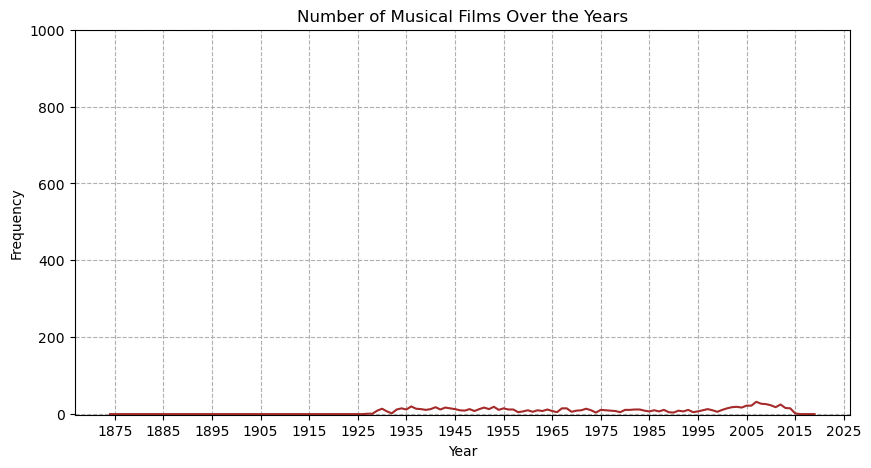

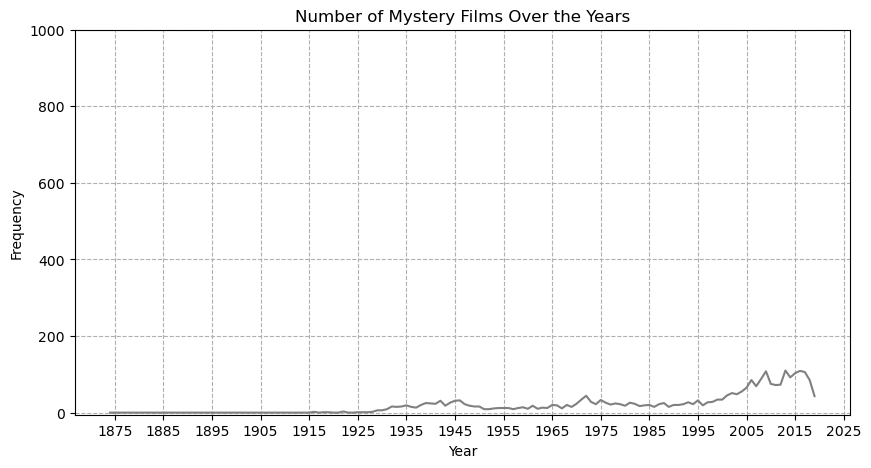

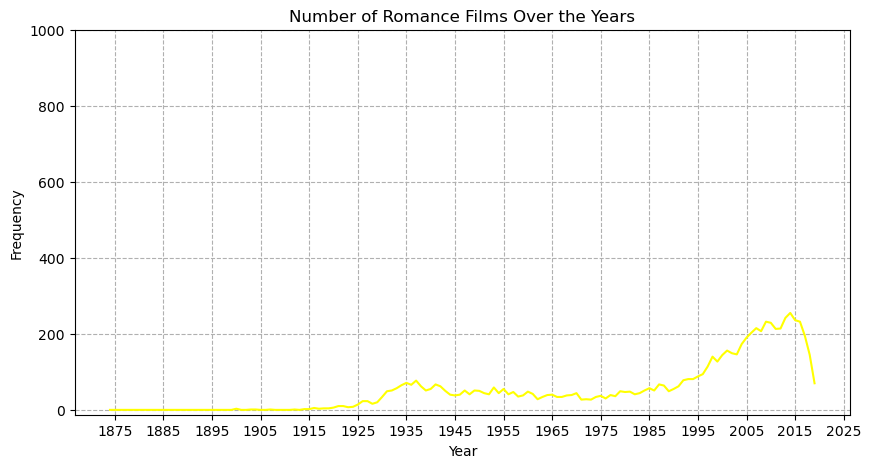

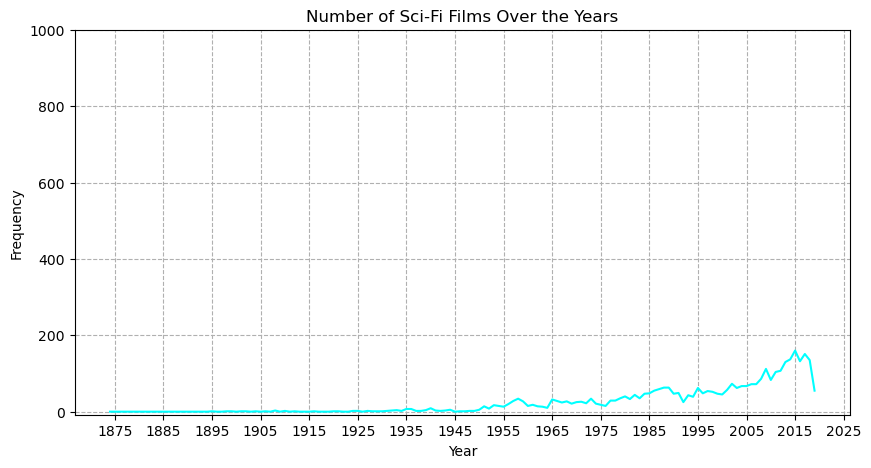

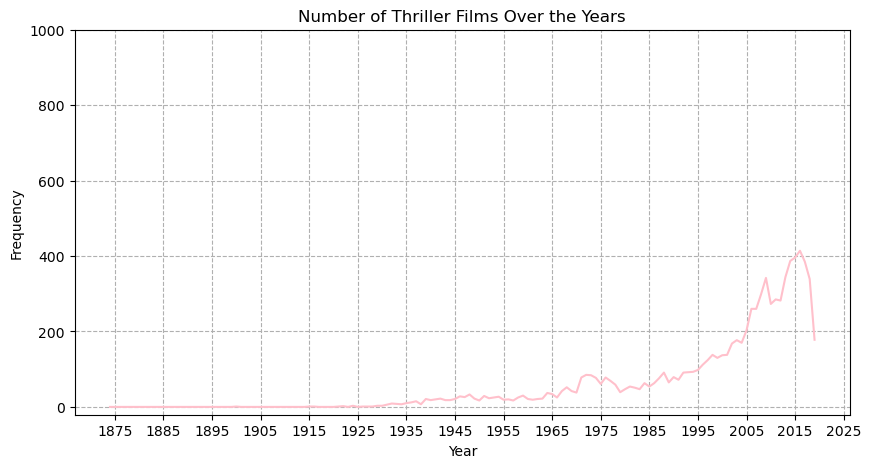

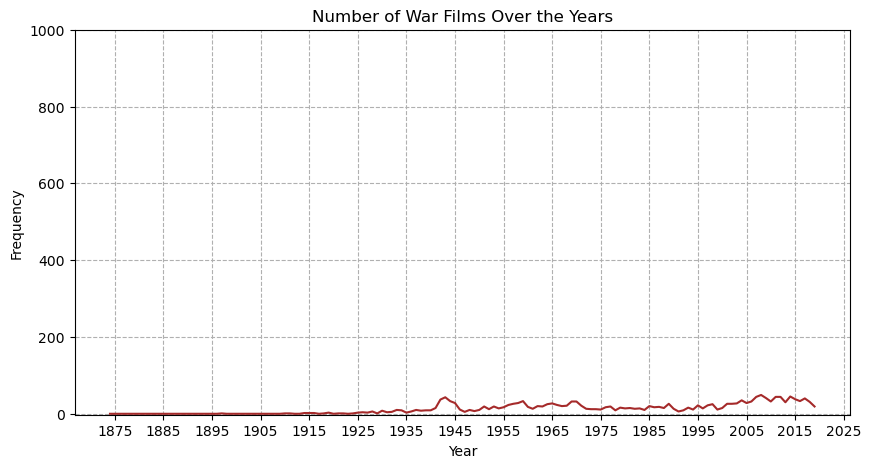

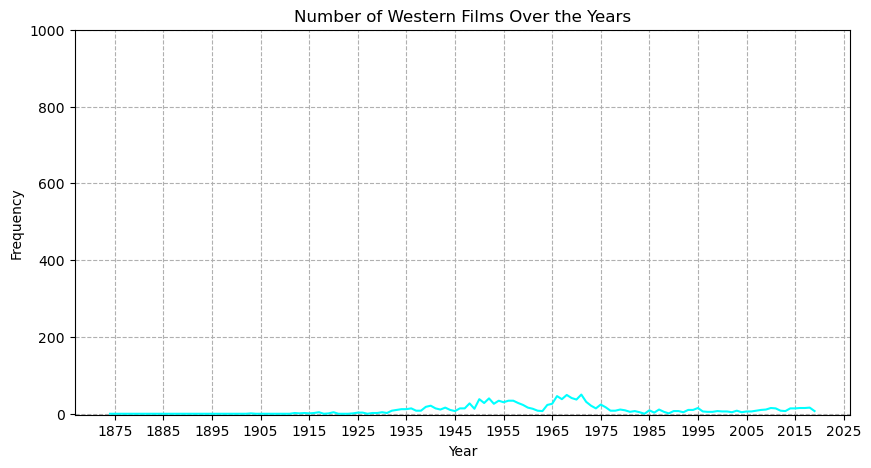

In [30]:
colors = ['orange', 'red', 'green', 'blue', 'purple', 'pink', 'brown', 'yellow', 'cyan', 'gray']
for index, row in mygc.iterrows(): 
    s = row['Frequency'] 
    s.plot(xlabel='Year', ylabel='Frequency', title = f"Number of {index} Films Over the Years", figsize=(10, 5), color = random.choice(colors))
    plt.xticks(range(1875, 2030, 10))
    plt.yticks(range(0, 1001, 200)) 
    plt.grid(linestyle = 'dashed')
    plt.show()

There hasn't been a change of taste over the years, but there are sudden growth for 3 genres in the 2000's, namely Comedy, Documentarym and Drama. The rest have followed the same trend of growth or decline.

### What are the top 20 movies that has the top amount of users rating and has the highest rate?

Top 20 Numerous User Ratings
| Title                                                                          |   Number of Users |   Average Rating |
|--------------------------------------------------------------------------------|-------------------|------------------|
| Forrest Gump (1994)                                                            |             81491 |            4.048 |
| Shawshank Redemption, The (1994)                                               |             81482 |            4.414 |
| Pulp Fiction (1994)                                                            |             79672 |            4.189 |
| Silence of the Lambs, The (1991)                                               |             74127 |            4.151 |
| Matrix, The (1999)                                                             |             72674 |            4.154 |
| Star Wars: Episode IV - A New Hope (1977)                                      |             68717 |            4.1

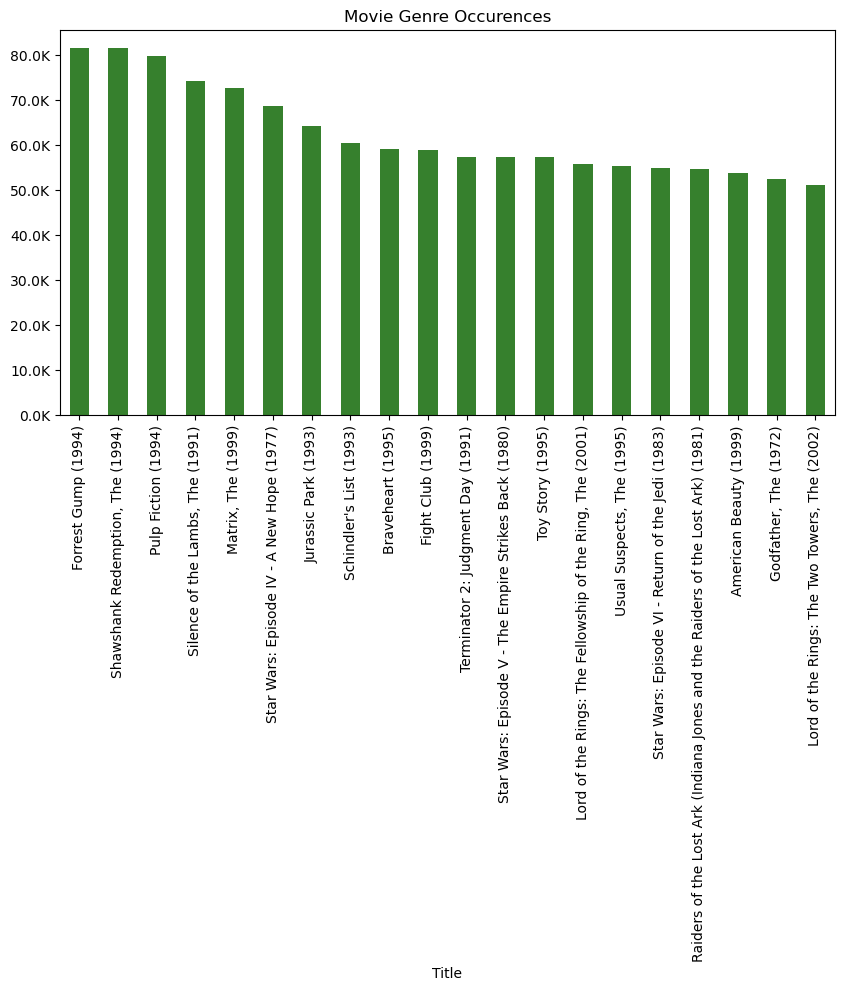

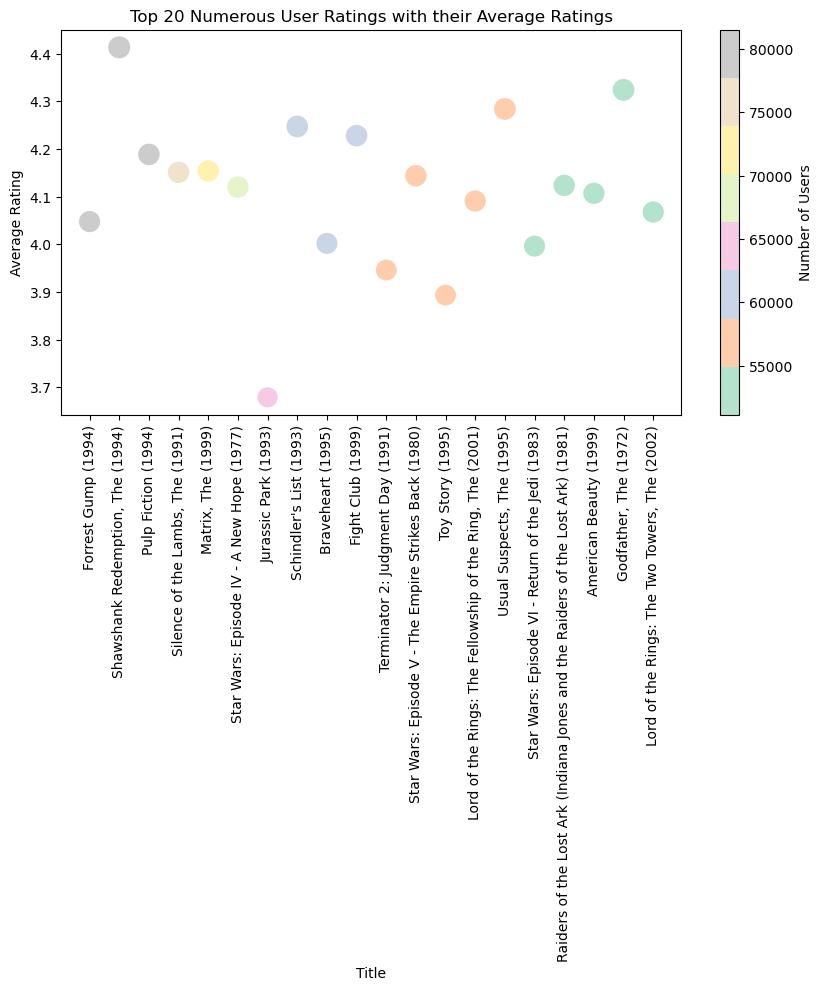

In [76]:
mrat = ratings.groupby('movieId').agg(num_users = ('userId', 'nunique'), ave_rating = ('rating', 'mean')).reset_index()
mrat = mrat.merge(movies[['movieId', 'title']], on='movieId', how='left').sort_values(by = 'num_users', ascending = False).head(20)
mrat.drop('movieId', axis=1, inplace=True)
mrat.insert(0, 'title', mrat.pop('title'))
mrat_max = mrat.loc[mrat['ave_rating'].idxmax()]

print("Top 20 Numerous User Ratings")
print(tab(mrat, headers = ['Title', 'Number of Users', 'Average Rating'], tablefmt = 'github', floatfmt = '.3f', showindex = False))
print(f'The highest average rating from the top 20 numerous user ratings is {mrat_max["ave_rating"]:.3f}')

mratp = mrat.plot(x = 'title', y = 'num_users', kind = 'bar', stacked = False, title = 'Movie Genre Occurences', color = '#36802d', legend = False, figsize = (10, 5))
mratp.set_xlabel('Title')
formatter = FuncFormatter(lambda x, _: '{:,}K'.format(x/1e3))
mratp.yaxis.set_major_formatter(formatter)
plt.show()

fig, ax = plt.subplots(figsize = (10,5))
f = ax.scatter(x = mrat['title'], y = mrat['ave_rating'], c = mrat['num_users'], cmap='Pastel2', s = mrat['ave_rating'] * 50)
cbar = plt.colorbar(f)
ax.set_title('Top 20 Numerous User Ratings with their Average Ratings')
ax.set_xlabel('Title')
ax.set_ylabel('Average Rating')
cbar.set_label('Number of Users')
plt.xticks(rotation=90)

plt.show()

### What is the most of popular season for releasing movies?